#2011년도와 2021년도 멜론 TOP50 노래 정보 시각화

##1.패키지 설치 및 임포트

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.3 MB/s eta 0:00:00


In [ ]:
import datetime

import pandas as pd
import seaborn as sns
from google.colab import drive
from  collections import Counter
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import koreanize_matplotlib

##2.데이터 불러오기

In [ ]:
#2011년 데이터 불러오기
m2011_df = pd.read_csv('/content/멜론 TOP 50 2011_20240710.csv')

#2021년 데이터 불러오기
m2021_df = pd.read_csv('/content/멜론 2021년 top 50_20240710.csv')
m2021_df

,노래제목,가수,가사
0,Celebrity,아이유,"세상의 모서리구부정하게 커버린골칫거리 outsider걸음걸이, 옷차림, 이어폰 너..."
1,롤린 (Rollin'),브레이브걸스,그 날을 잊지 못해 babe날 보며 환히 웃던 너의 미소에홀린 듯 I'm fall...
2,Dynamite,방탄소년단,Cos ah ahI’m in the stars tonightSo watch me ...
3,Next Level,aespa,I’m on the Next Level Yeah절대적 룰을 지켜내 손을 놓지 말아...
4,라일락,아이유,나리는 꽃가루에 눈이 따끔해 (아야)눈물이 고여도 꾹 참을래내 마음 한켠 비밀스런...
5,밤하늘의 별을(2020),경서,밤하늘의 별을 따서 너에게 줄래 너는 내가 사랑하니까 더 소중하니까 오직 너 아니...
6,신호등,이무진,이제야 목적지를 정했지만가려한 날 막아서네 난 갈 길이 먼데새빨간 얼굴로 화를 냈...
7,Butter,방탄소년단,Smooth like butterLike a criminal undercoverG...
8,내 손을 잡아,아이유,느낌이 오잖아 떨리고 있잖아 언제까지 눈치만 볼 거니 네 맘을 말해봐 딴청 피우지...
9,밝게 빛나는 별이 되어 비춰줄게,송이한,우리의 모든 순간이애틋해 눈물 날 때면언제나 네게 닿을 수 있게가까이서 머물게유난...


##3.데이터 시각화(연도별 유행가수 알아보기) - WordCOloud

###3-1.TOP50곡 가수 WordCloud시각화

In [ ]:
#11년도 모든 가수를 담는 리스트 생성
singers_list_11 = list(m2011_df['가수'])

#21년도 모든 가수를 담는 리스트 생성
singers_list_21 = list(m2021_df['가수'])
singers_list_21

['아이유',
 '브레이브걸스',
 '방탄소년단',
 'aespa',
 '아이유',
 '경서',
 '이무진',
 '방탄소년단',
 '아이유',
 '송이한',
 'MSG워너비(M.O.M)',
 '장범준',
 '헤이즈 (Heize)',
 'BLACKPINK',
 '산들',
 '미란이 (MIRANI), 먼치맨(MUNCHMAN), Khundi Panda, 머쉬베놈 (MUSHVENOM)',
 '브레이브걸스',
 '오마이걸 (OH MY GIRL)',
 '아이유',
 '아이유',
 'AKMU (악뮤)',
 '스탠딩 에그',
 '장범준',
 '이예준',
 '방탄소년단',
 '폴킴',
 '양요섭, 정은지',
 '적재',
 '방탄소년단',
 'STAYC(스테이씨)',
 '창모 (CHANGMO)',
 'SG 워너비',
 '호미들',
 '조정석',
 '태연 (TAEYEON)',
 '오마이걸 (OH MY GIRL)',
 '방탄소년단',
 '방탄소년단',
 'ASH ISLAND',
 '정동하',
 '디핵 (D-Hack), PATEKO (파테코)',
 '마크툽 (MAKTUB)',
 'AKMU (악뮤)',
 '임영웅',
 '경서예지',
 '경서예지, 전건호',
 '로제 (ROSÉ)',
 '임창정',
 '오반',
 '10CM']

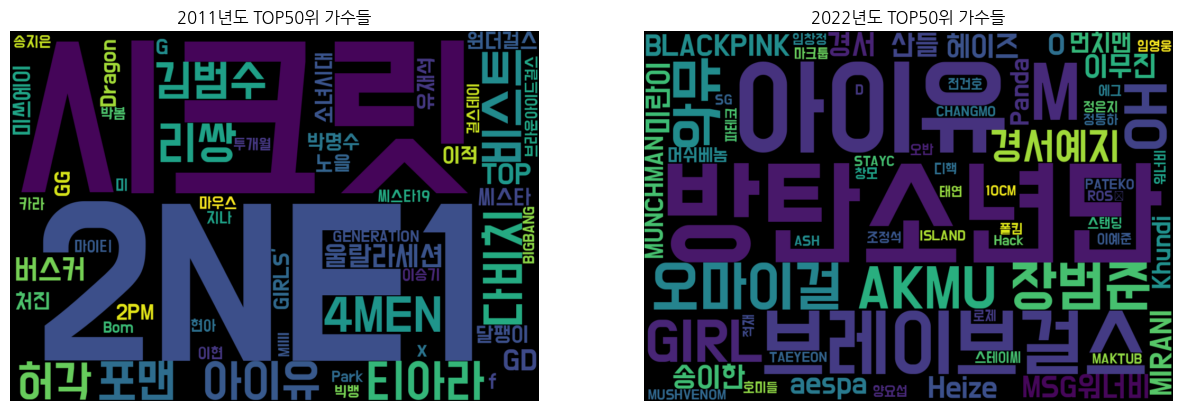

In [ ]:
#워드클라우드 시각화를 위한 폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

#워드클라우드로 표현하기 위해 텍스트 뭉치로 변환
text_11 = ' '.join(singers_list_11)
text_21 = ' '.join(singers_list_21)

#워드클라우드 객체 생성
wc_11 = WordCloud(width=1000, height=700, font_path=font_path).generate(text_11)
wc_21 = WordCloud(width=1000, height=700, font_path=font_path).generate(text_21)

#워드클라우드 그리기
fig = plt.figure(figsize=(15,5))
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(wc_11, interpolation='bilinear')
ax1.set_title('2011년도 TOP50위 가수들')
ax1.axis('off')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(wc_21, interpolation='bilinear')
ax2.set_title('2022년도 TOP50위 가수들')
ax2.axis('off')

plt.show()

##4.데이터 시각화(연도별 유행가수 알아보기) - PieChart, BarChart

###4-1.TOP50곡 가수 빈도수 PieChart, BarChart시각화

In [ ]:
# 2011년도 가수 빈도수 계산
singer_count_11 = m2011_df['가수'].value_counts()

# 2021년도 가수 빈도수 계산
singer_count_21 = m2021_df['가수'].value_counts()
singer_count_21

가수
방탄소년단                                                          6
아이유                                                            5
브레이브걸스                                                         2
장범준                                                            2
AKMU (악뮤)                                                      2
오마이걸 (OH MY GIRL)                                              2
정동하                                                            1
호미들                                                            1
조정석                                                            1
태연 (TAEYEON)                                                   1
ASH ISLAND                                                     1
마크툽 (MAKTUB)                                                   1
디핵 (D-Hack), PATEKO (파테코)                                      1
창모 (CHANGMO)                                                   1
임영웅                                                            1
경서예지                  

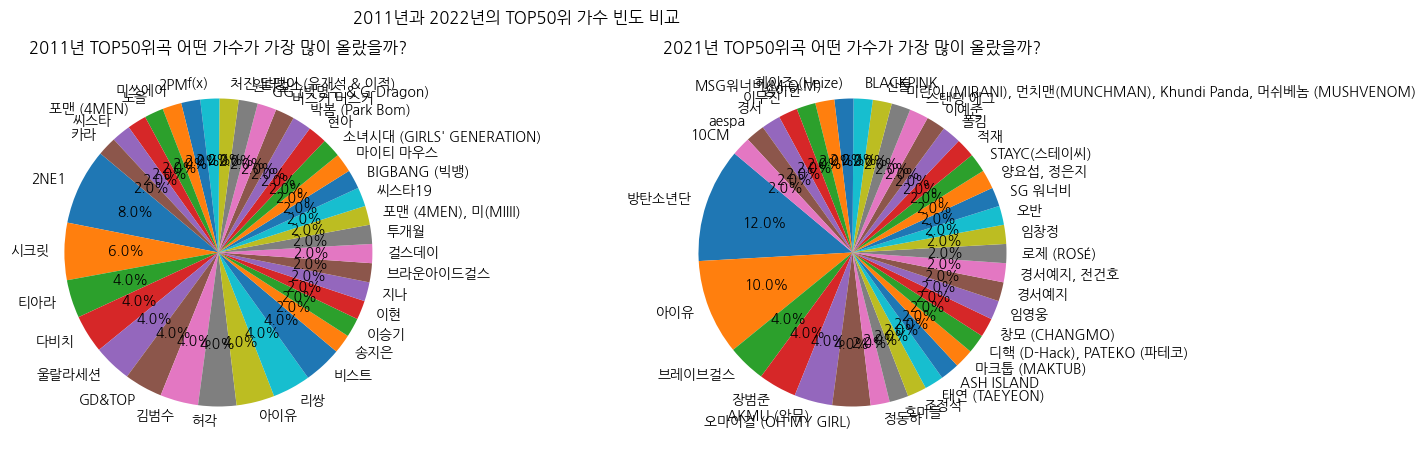

In [ ]:
#파이 차트로 비율 비교
fing, axes = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('2011년과 2022년의 TOP50위 가수 빈도 비교')

axes[0].pie(singer_count_11, labels=singer_count_11.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('2011년 TOP50위곡 어떤 가수가 가장 많이 올랐을까?')

axes[1].pie(singer_count_21, labels=singer_count_21.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('2021년 TOP50위곡 어떤 가수가 가장 많이 올랐을까?')
plt.show()

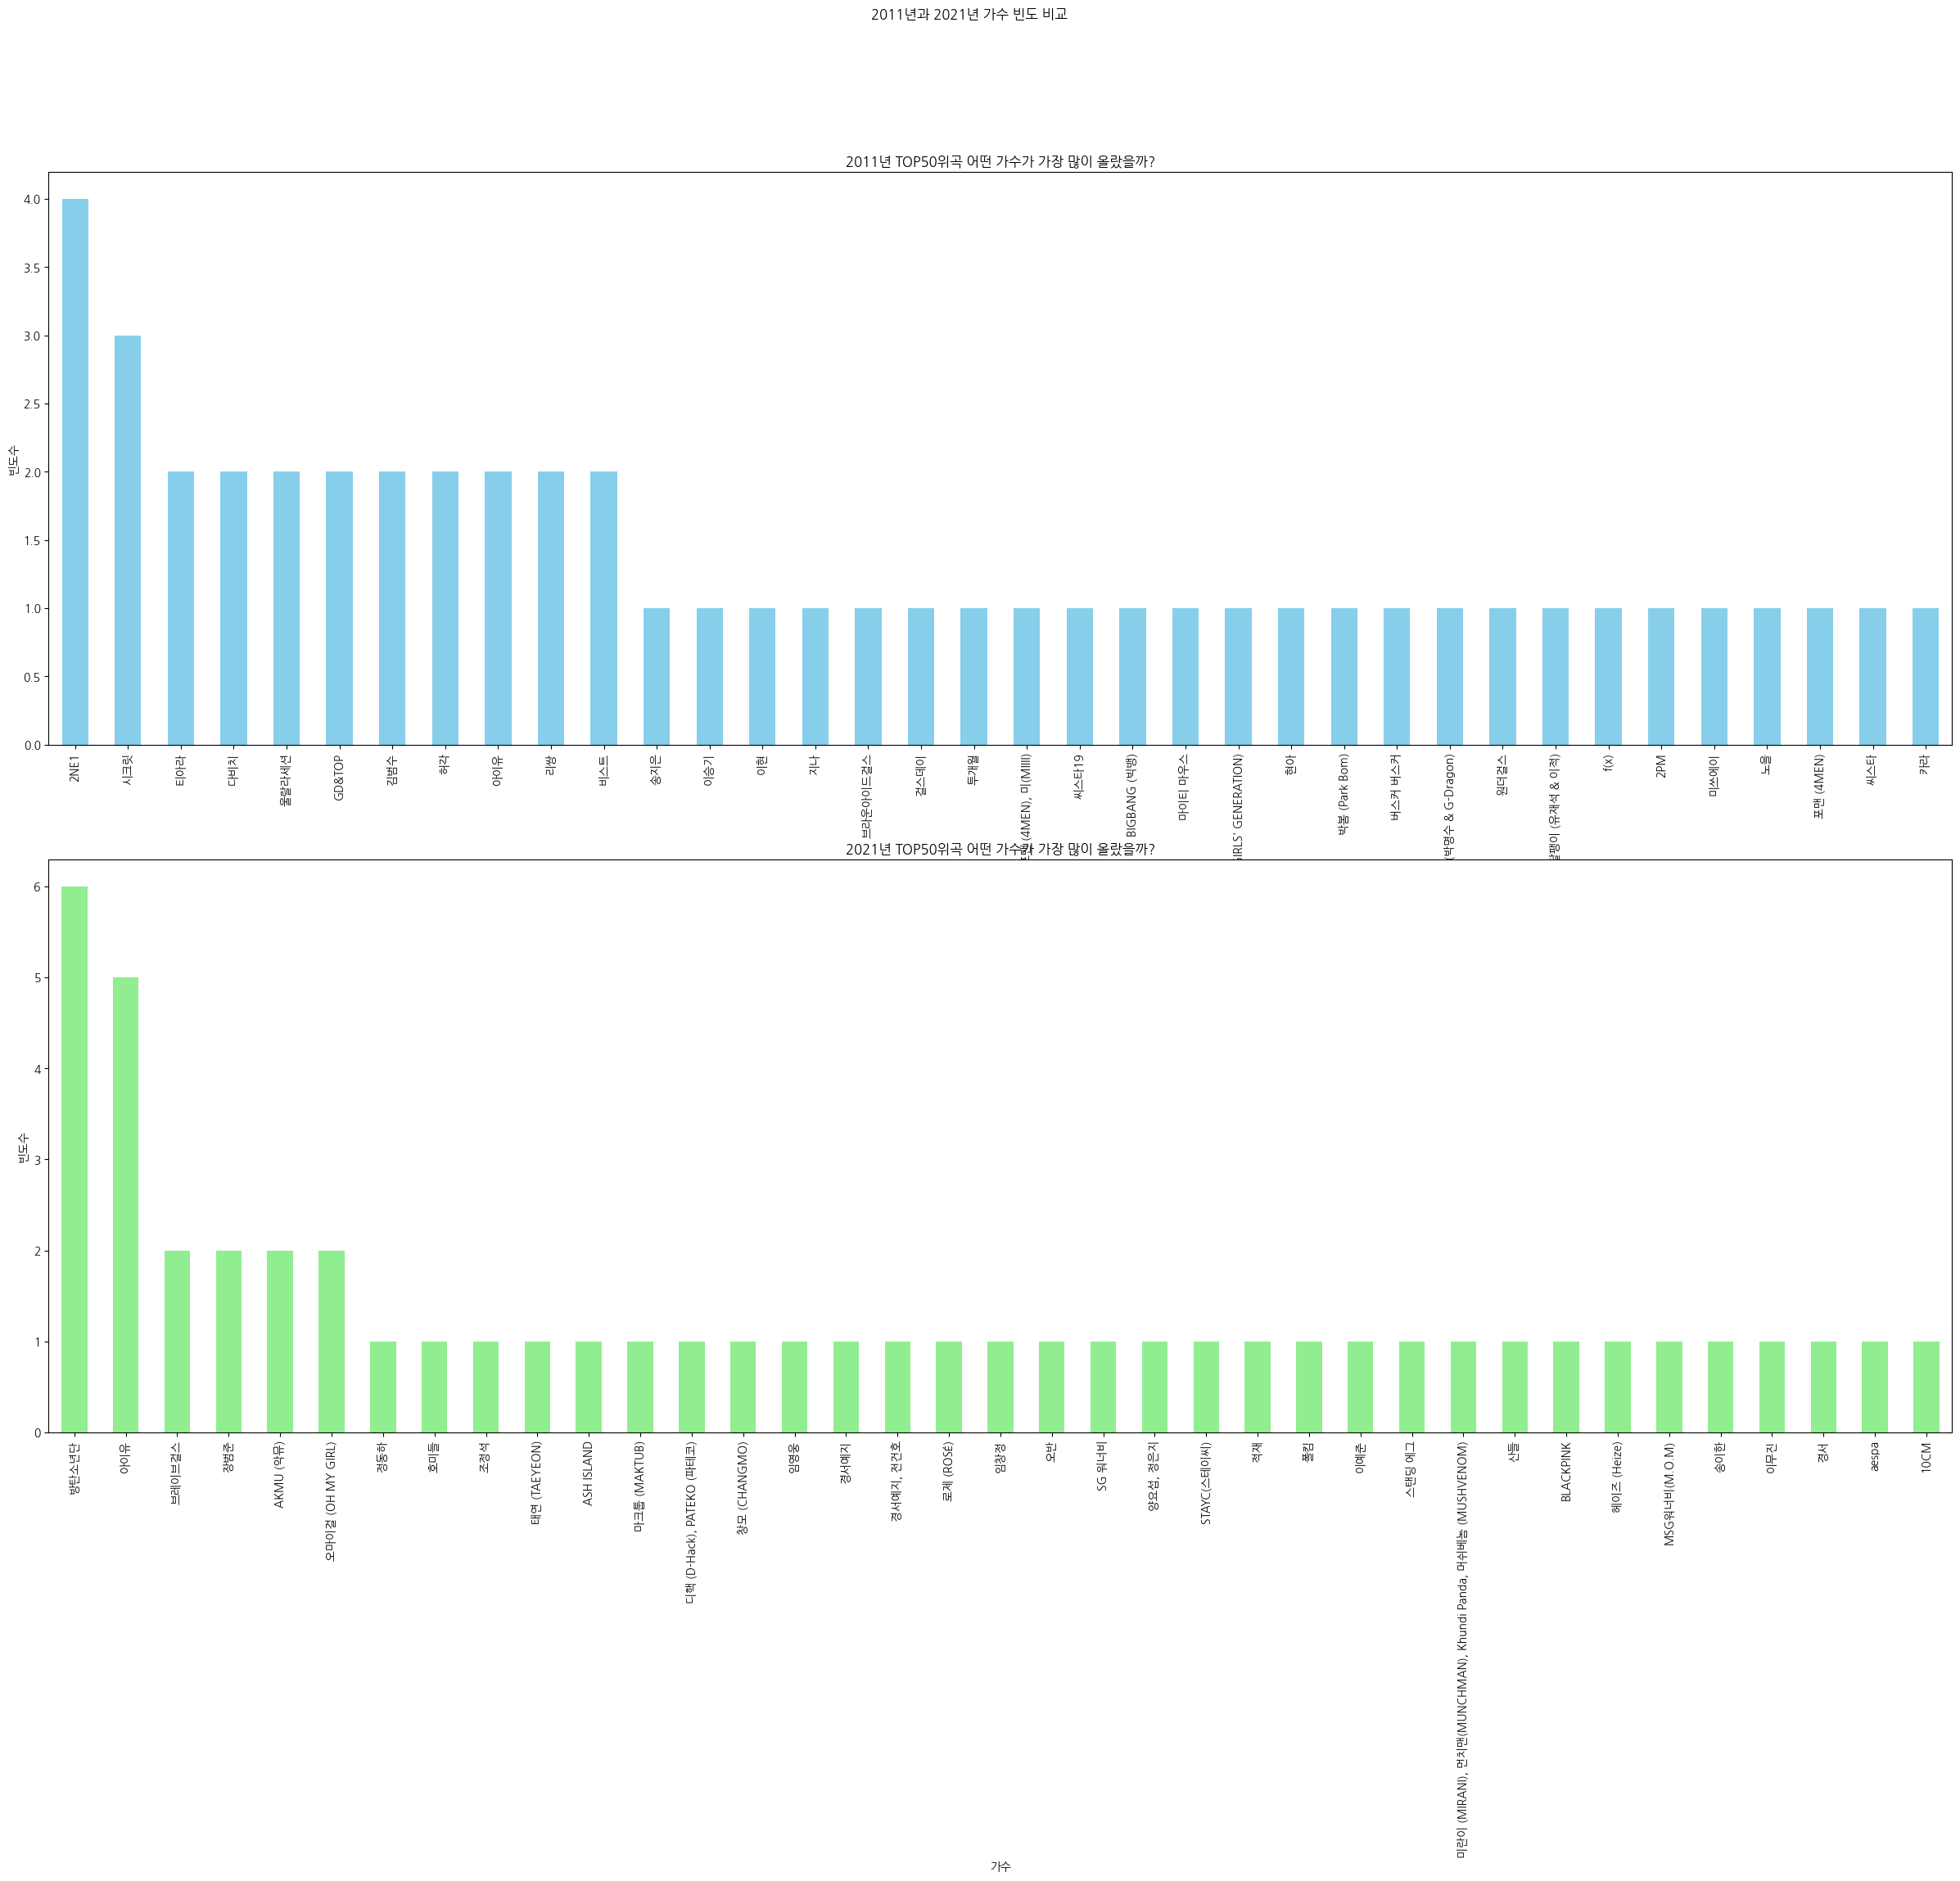

In [ ]:
# 11년도 막대그래프
fig, axes = plt.subplots(2, 1, figsize =(30, 20))
fig.suptitle('2011년과 2021년 가수 빈도 비교')

singer_count_11.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('2011년 TOP50위곡 어떤 가수가 가장 많이 올랐을까?')
axes[0].set_xlabel('가수')
axes[0].set_ylabel('빈도수')

# 21년도 막대그래프
singer_count_21.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('2021년 TOP50위곡 어떤 가수가 가장 많이 올랐을까?')
axes[1].set_xlabel('가수')
axes[1].set_ylabel('빈도수')

plt.show()

###4-2. 2011년 2021년 통합 빈도수 시각화

In [ ]:
# 2011년과 2021년 TOP50위 가수 통합 빈도 비교
all_singer = singers_list_11 + singers_list_21
all_singer_cnt = Counter(all_singer)
# 상위 20명의 가수와 빈도수
top_words = [word for word, freq in all_singer_cnt.most_common(20)]
top_freqs = [freq for word, freq in all_singer_cnt.most_common(20)]

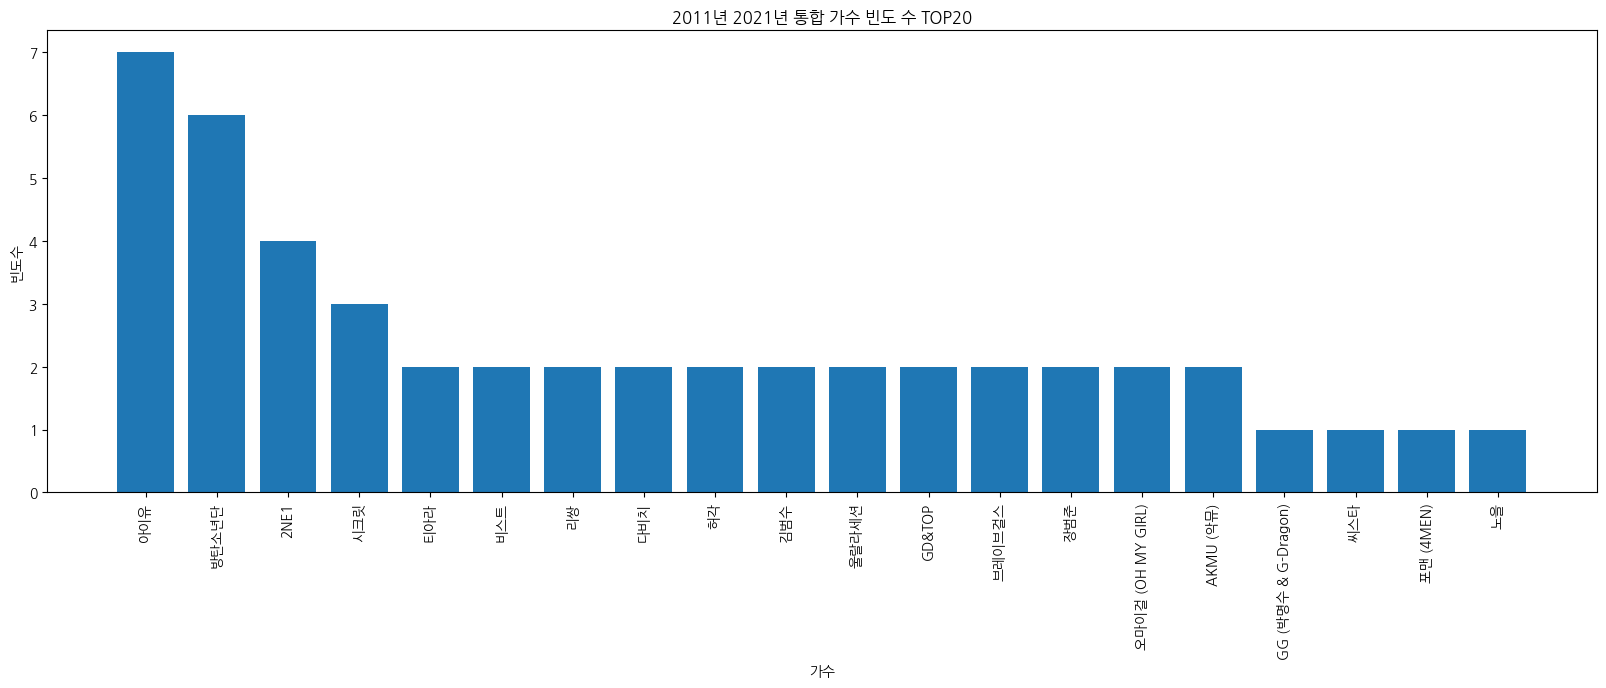

In [ ]:
#막대그래프 시각화
plt.figure(figsize=(20,6))
plt.bar(top_words, top_freqs)
plt.xlabel('가수')
plt.xticks(rotation=90)
plt.ylabel('빈도수')
plt.title('2011년 2021년 통합 가수 빈도 수 TOP20')
plt.show()

### 이이유의 가사엔 어떤 단어가 많았나


In [ ]:
#불용어 리스트와 함수 선언
stopwords =['은', '는', '이', '가', '으로', '에', '그', '어', 'a', 'the', 'an', 'i', 'da', 'm', 's', '말란', 'are', 'ooh', '내', '건', '네', '우우우']

def remove_stopwords(words):
  return [word for word in words if word not in stopwords]

# '가수' 컬럼이 '아이유'인 행들의 '가사' 컬럼 추출
lyrics11 = m2011_df.loc[m2011_df['가수'] == '아이유', '가사'].to_list()
lyrics21 = m2021_df.loc[m2021_df['가수'] == '아이유', '가사'].to_list()
print(lyrics11)

#하나의 리스트로
iu_lyrics = lyrics11 + lyrics21
#문자열로 연결
iu_lyrics = ' '.join(iu_lyrics)
#단어 추출
iu_words = re.findall(r'\b\w+\b', iu_lyrics.lower())
#불용어 처리
iu_words = remove_stopwords(iu_words)
# 단어의 빈도가 가장 높은 상위 20개 단어와 수를 추출
iu_word_freq = Counter(iu_words) # 수 세기, dic 처럼 생긴 counter객체 담김(딕셔너리 아님)
# 상위 20개의 단어
iu_top_words = [word for word, freq in iu_word_freq.most_common(20)] #상위 20개의 단어
# 단어 빈도수
iu_top_freqs = [freq for word, freq in iu_word_freq.most_common(20)]

["어쩜이렇게하늘은더파란건지오늘따라왜바람은또완벽한지그냥모르는척하나못들은척지워버린척딴얘길시작할까아무말못하게입맞출까눈물이차올라서고갤들어흐르지못하게또살짝웃어내게왜이러는지무슨말을하는지오늘했던모든말저하늘위로한번도못했던말울면서할줄은나몰랐던말나는요오빠가좋은걸어떡해새로바뀐내머리가별로였는지입고나왔던옷이실수였던건지아직모르는척기억안나는척아무일없던것처럼굴어볼까그냥나가자고얘기할까눈물이차올라서고갤들어흐르지못하게또살짝웃어내게왜이러는지무슨말을하는지오늘했던모든말저하늘위로한번도못했던말울면서할줄은나몰랐던말나는요오빠가좋은걸어떡해이런나를보고그런슬픈말은하지말아요철없는건지조금둔한건지믿을수가없는걸요눈물은나오는데활짝웃어네앞을막고서막크게웃어내가왜이러는지부끄럼도없는지자존심은곱게접어하늘위로한번도못했던말어쩌면다신못할바로그말나는요오빠가좋은걸아이쿠하나둘I'minmydreamIt'stoobeautifulbeautifuldayMakeitagooddayJustdon'tmakemecry이렇게좋은날", '정말넌다잊었더라반갑게날보는너의얼굴보니그제야어렴풋이아파오더라새살차오르지못한상처가눈물은흐르질않더라이별이라하는게대단치도못해서이렇게보잘것없어서좋은이별이란거결국세상엔없는일이라는걸알았다면그때차라리다울어둘걸그때이미나라는건네겐끝이었다는건나만몰랐었던이야기사랑은아니었더라내곁에머물던시간이었을뿐이제야어렴풋이알것만같아왜넌미안했어야만했는지내가너무들떴었나봐떠나는순간마저기대를했었다니얼마나우스웠던거니좋은이별이란거결국세상엔없는일이라는걸알았다면그때차라리다울어둘걸그때이미나라는건네겐끝이었다는건나만몰랐었던이야기']


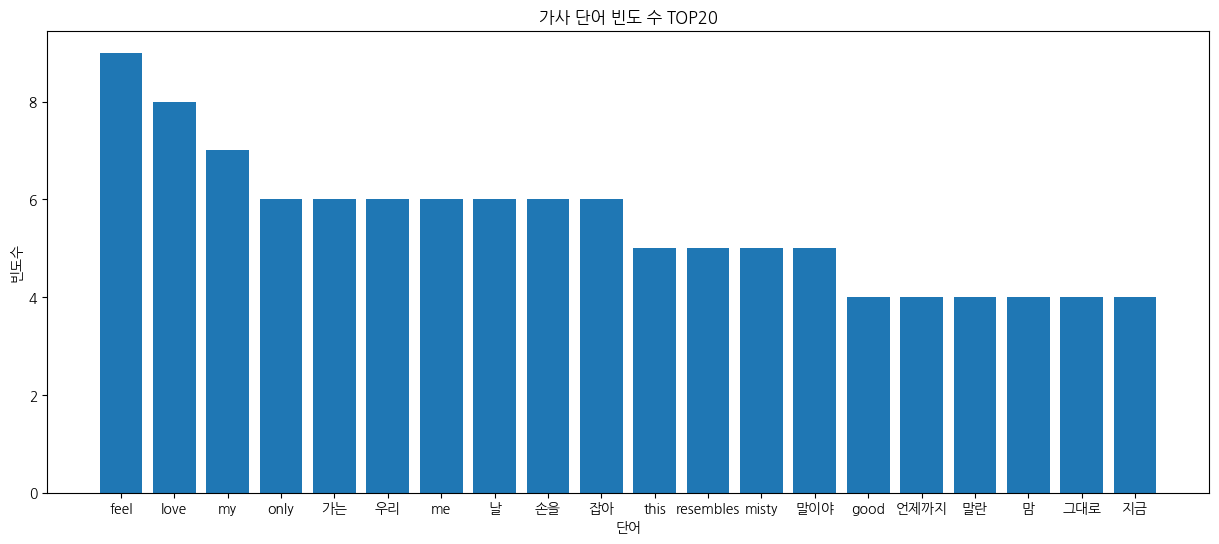

In [ ]:
# 막대그래프 시각화
plt.figure(figsize=(15,6))
plt.bar(iu_top_words, iu_top_freqs)
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('가사 단어 빈도 수 TOP20')
plt.show()

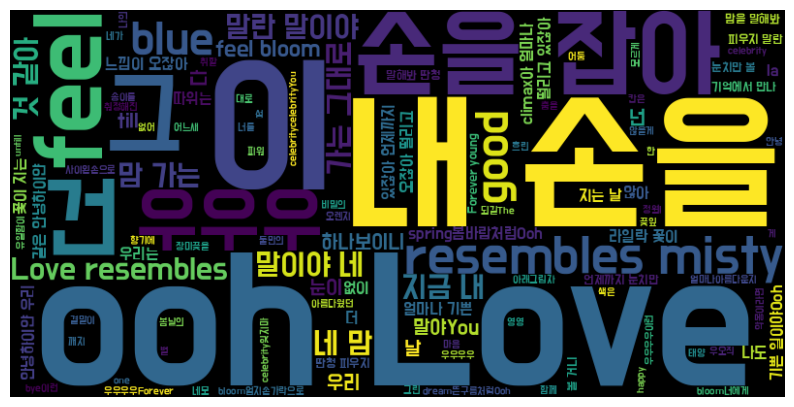

In [ ]:
# word 클라우드 시각화
iu_wc = WordCloud(width=800, height=400, font_path='/content/BMDOHYEON_ttf.ttf').generate(iu_lyrics)
plt.figure(figsize=(10,6))
plt.imshow(iu_wc, interpolation='bilinear')
plt.axis('off')
plt.show()